In [1]:
import numpy as np
from numpy import r_, c_ # Convenient syntax to create numpy arrays with e.g. r_[1,2,3] (concatenates in a row) or c_[1,2,3] (concatenates in a column)
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
sns.set()

# Import census data
Load the CSV as a Pandas DataFrame, and the columns into a list.

In [2]:
# Parse metadata file to get column names
columns = []
for line in open('us_census_full/census_income_metadata.txt','r'):
    li=line.strip() # Strip trailing whitespace
    if not (li.startswith("|") or li.startswith("-") or li==''): # Strip comment lines and empty lines
        variable = li.split(':') # Split column description at colon
        columns.append(variable[0]) # Add column name to list

# Add final (problem) column name
columns.append('Income over 50k')

In [3]:
# Load US census data
# Separator is a comma followed by a space
# NaN values are specified by '?'
census = pd.read_csv('us_census_full/census_income_learn.csv', names = columns, sep=',\s', na_values=['?'], engine='python')
census['Income over 50k'] = census['Income over 50k']=='50000+.' # Convert last (problem) column to bool
census.drop('instance weight', axis=1, inplace=True) # Drop instance weight column as not to be used in classifier
census.head()

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,Income over 50k
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,False
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,False
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,False
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,False
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,False


# Statistical audit

Let's look at the available features (i.e. columns in the CSV) and the number of entries

In [4]:
# Number of entries and available data
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199523 entries, 0 to 199522
Data columns (total 41 columns):
 #   Column                                      Non-Null Count   Dtype 
---  ------                                      --------------   ----- 
 0   age                                         199523 non-null  int64 
 1   class of worker                             199523 non-null  object
 2   detailed industry recode                    199523 non-null  int64 
 3   detailed occupation recode                  199523 non-null  int64 
 4   education                                   199523 non-null  object
 5   wage per hour                               199523 non-null  int64 
 6   enroll in edu inst last wk                  199523 non-null  object
 7   marital stat                                199523 non-null  object
 8   major industry code                         199523 non-null  object
 9   major occupation code                       199523 non-null  object
 10  race    

Where are we missing data?

In [5]:
#How many missing data in each column?
census.isnull().sum()

age                                               0
class of worker                                   0
detailed industry recode                          0
detailed occupation recode                        0
education                                         0
wage per hour                                     0
enroll in edu inst last wk                        0
marital stat                                      0
major industry code                               0
major occupation code                             0
race                                              0
hispanic origin                                 874
sex                                               0
member of a labor union                           0
reason for unemployment                           0
full or part time employment stat                 0
capital gains                                     0
capital losses                                    0
dividends from stocks                             0
tax filer st

## Univariate analysis

The data provided includes continuous numerical values (e.g. *age*, *wage per hour*, *dividends from stocks*), as well as categorical data (e.g. *education*, *tax filer stat*, *citizenship*). We'll treat each of these two types of data differently.

For categorical data we'll plot a bar chart showing each category within a feature, along with a summary of the proportion of each category within that column.

For numerical values we'll show some statistics of the data including mean, median, and standard deviation, and we'll plot a histogram to visualise the distribution of the data, as well as a box plot to show the median, upper and lower quartiles. The whiskers of the box plot are capped at 1.5* the IQR, and any data beyond this is shown as an outlier.

Some interesting features of the data will be briefly commented on.

### Income

False    0.937942
True     0.062058
Name: Income over 50k, dtype: float64


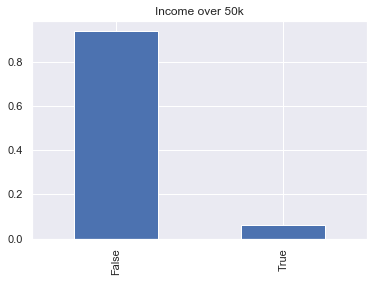

In [6]:
column = census['Income over 50k']
values = column.value_counts(normalize=True)
print(values)
values.plot.bar()
plt.title(column.name)
plt.show()

### Age

In [7]:
column = census['age']
column.describe()

count    199523.000000
mean         34.494199
std          22.310895
min           0.000000
25%          15.000000
50%          33.000000
75%          50.000000
max          90.000000
Name: age, dtype: float64

Seems age is capped at 90

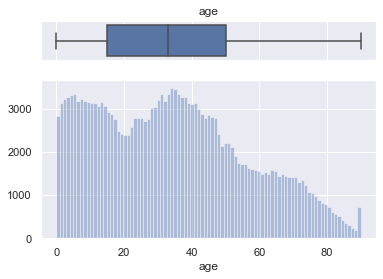

In [8]:
column = census['age']
#values = column.value_counts(normalize=True)
#print(values)

# Generate two axes on figure
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2,.8)})
 
# Plot histogram and boxplot
sns.distplot(column,bins=91,kde=False, ax=ax_hist)
sns.boxplot(column, ax=ax_box)

ax_box.set(xlabel='')
ax_box.set(title=column.name)
plt.show()

There is an increase in the population of the 90 bin due to age being capped at 90.

There's more to see here, we'll revisit this when we look at the distribution of sex in the US census dataset.

### Class of worker

Not in universe                   0.502423
Private                           0.361001
Self-employed-not incorporated    0.042326
Local government                  0.039013
State government                  0.021186
Self-employed-incorporated        0.016364
Federal government                0.014660
Never worked                      0.002200
Without pay                       0.000827
Name: class of worker, dtype: float64


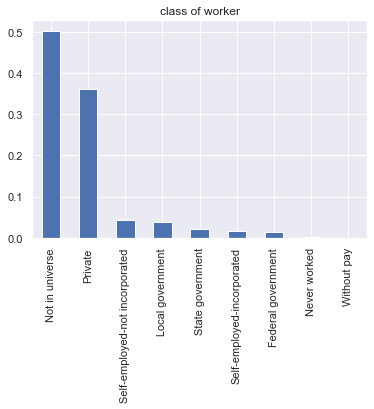

In [9]:
column = census['class of worker']
values = column.value_counts(normalize=True)
print(values)
values.plot.bar()
plt.title(column.name)
plt.show()

Not in universe includes schoolchildren and retired people

### Education

High school graduate                      0.242614
Children                                  0.237677
Some college but no degree                0.139433
Bachelors degree(BA AB BS)                0.099562
7th and 8th grade                         0.040131
10th grade                                0.037875
11th grade                                0.034462
Masters degree(MA MS MEng MEd MSW MBA)    0.032783
9th grade                                 0.031224
Associates degree-occup /vocational       0.026854
Associates degree-academic program        0.021867
5th or 6th grade                          0.016424
12th grade no diploma                     0.010655
1st 2nd 3rd or 4th grade                  0.009017
Prof school degree (MD DDS DVM LLB JD)    0.008986
Doctorate degree(PhD EdD)                 0.006330
Less than 1st grade                       0.004105
Name: education, dtype: float64


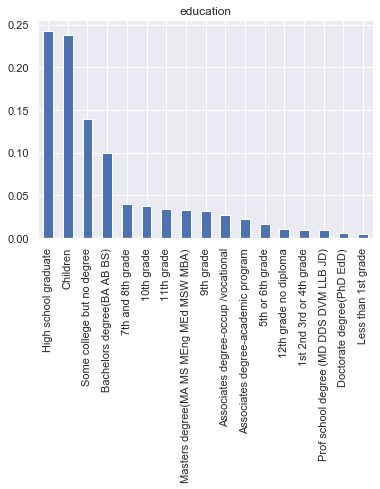

In [10]:
column = census['education']
values = column.value_counts(normalize=True)
print(values)
values.plot.bar()
plt.title(column.name)
plt.show()

### Wage per hour

In [11]:
column = census['wage per hour']
percentearningnothing = column.loc[(column==0)].count()/len(census)
print('Percent with zero wage: {:2.1f}%'.format(percentearningnothing*100))

Percent with zero wage: 94.3%


The number of people earning zero wage seem far overrepresented. Seems missing data for this column was given the value 0.

We should neglect zero wage to avoid skewing the data with these missing values.

The following represent wage per hour for earning workers.

In [12]:
column = census['wage per hour']
column = column.loc[(column!=0)] # Select only rows with non-zero value
column.describe()

count    11304.000000
mean       978.321214
std        656.483129
min         20.000000
25%        584.750000
50%        800.000000
75%       1200.000000
max       9999.000000
Name: wage per hour, dtype: float64

These values seem to be in ¢/hour, or the US is a lot richer than I thought!

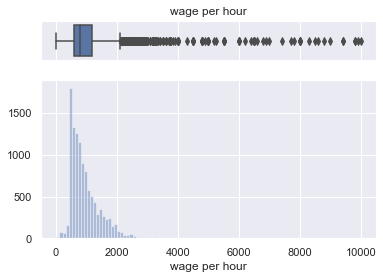

In [13]:
column = census['wage per hour']
column = column.loc[(column!=0)] # Select only rows with non-zero value

# Generate two axes on figure
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2,.8)})
 
# Plot histogram and boxplot
sns.distplot(column,bins=100,kde=False, ax=ax_hist)
sns.boxplot(column, ax=ax_box)

ax_box.set(xlabel='')
ax_box.set(title=column.name)
plt.show()

There are a lot of outliers indicating individuals who earn far more than the typical/average worker. 

We can have a closer look at these outliers:

In [14]:
# Calculate the quartiles
wage_Q3 = column.quantile(0.75)
wage_Q1 = column.quantile(0.25)
wage_IQR = wage_Q3 - wage_Q1

wage_outlier_threshold = wage_Q3 + 1.5*wage_IQR # This is how seaborn defines the whiskers on the boxplot

num_of_outliers = (column > wage_outlier_threshold).sum()

print('{:.2f}% of earners have hourly wages above ${:.2f}/h'.format(100*num_of_outliers/len(column),wage_outlier_threshold/100))

3.57% of earners have hourly wages above $21.23/h


What about the highest earning 1%?

In [15]:
# 1% of earners earn above this
wage_1percent_threshold = column.quantile(0.99)

print('{:.0f}% of earners have hourly wages above ${:.2f}/h'.format(1,wage_1percent_threshold/100))

1% of earners have hourly wages above $30.00/h


What about the highest earning 0.1%?

In [16]:
# 1% of earners earn above this
wage_01percent_threshold = column.quantile(0.999)

print('{:.1f}% of earners have hourly wages above ${:.2f}/h'.format(0.1,wage_01percent_threshold/100))

0.1% of earners have hourly wages above $80.00/h


### Enrolled in education

Not in universe          0.936950
High school              0.034542
College or university    0.028508
Name: enroll in edu inst last wk, dtype: float64


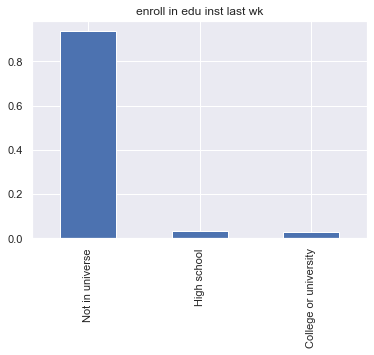

In [17]:
column = census['enroll in edu inst last wk']
values = column.value_counts(normalize=True)
print(values)
values.plot.bar()
plt.title(column.name)
plt.show()

### Marital status

Never married                      0.433459
Married-civilian spouse present    0.422117
Divorced                           0.063702
Widowed                            0.052440
Separated                          0.017341
Married-spouse absent              0.007608
Married-A F spouse present         0.003333
Name: marital stat, dtype: float64


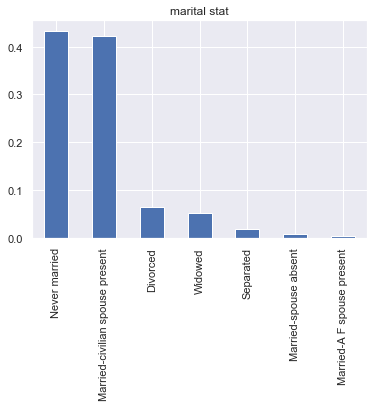

In [18]:
column = census['marital stat']
values = column.value_counts(normalize=True)
print(values)
values.plot.bar()
plt.title(column.name)
plt.show()

### Industry and occupation

In [19]:
column = census['major industry code']
percentearningnothing = column.loc[(column=='Not in universe or children')].count()/len(census)
print('Unclassified percentage: {:2.1f}%'.format(percentearningnothing*100))

Unclassified percentage: 50.5%


Unclassified people include retired and children. Neglect in the following plots so that the distribution of working people is more easily seen.

Retail trade                           0.172705
Manufacturing-durable goods            0.091209
Education                              0.083803
Manufacturing-nondurable goods         0.069780
Finance insurance and real estate      0.062172
Construction                           0.060543
Business and repair services           0.057174
Medical except hospital                0.047380
Public administration                  0.046642
Other professional services            0.045346
Transportation                         0.042584
Hospital services                      0.040106
Wholesale trade                        0.036382
Agriculture                            0.030585
Personal services except private HH    0.029715
Social services                        0.025789
Entertainment                          0.016704
Communications                         0.011949
Utilities and sanitary services        0.011918
Private household services             0.009561
Mining                                 0

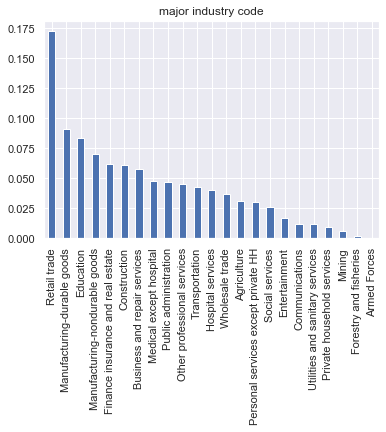

In [20]:
column = census['major industry code']
column = column.loc[(column!='Not in universe or children')] # Select only rows with non-zero value
values = column.value_counts(normalize=True)
print(values)
values.plot.bar()
plt.title(column.name)
plt.show()

In [21]:
column = census['major occupation code']
percentearningnothing = column.loc[(column=='Not in universe')].count()/len(census)
print('Unclassified percentage: {:2.1f}%'.format(percentearningnothing*100))

Unclassified percentage: 50.5%


Unclassified people include retired and children. Neglect in the following plots.

Adm support including clerical           0.150113
Professional specialty                   0.141037
Executive admin and managerial           0.126418
Other service                            0.122411
Sales                                    0.119214
Precision production craft & repair      0.106415
Machine operators assmblrs & inspctrs    0.064539
Handlers equip cleaners etc              0.041755
Transportation and material moving       0.040672
Farming forestry and fishing             0.031830
Technicians and related support          0.030535
Protective services                      0.016805
Private household services               0.007892
Armed Forces                             0.000364
Name: major occupation code, dtype: float64


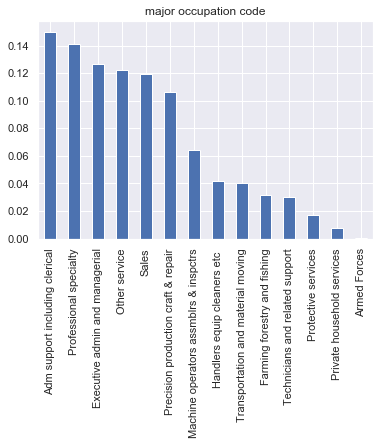

In [22]:
column = census['major occupation code']
column = column.loc[(column!='Not in universe')] # Select only rows with non-zero value
values = column.value_counts(normalize=True)
print(values)
values.plot.bar()
plt.title(column.name)
plt.show()

### Race and hispanic origin

White                          0.838826
Black                          0.102319
Asian or Pacific Islander      0.029245
Other                          0.018329
Amer Indian Aleut or Eskimo    0.011282
Name: race, dtype: float64


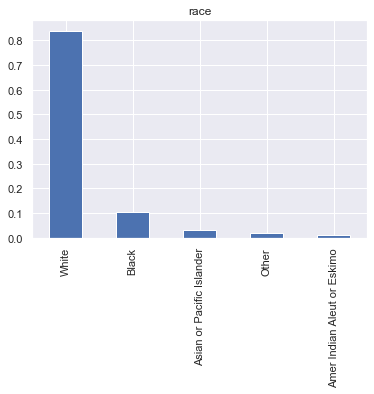

In [23]:
column = census['race']
values = column.value_counts(normalize=True)
print(values)
values.plot.bar()
plt.title(column.name)
plt.show()

All other                    0.865381
Mexican-American             0.040670
Mexican (Mexicano)           0.036416
Central or South American    0.019607
Puerto Rican                 0.016678
Other Spanish                0.012510
Cuban                        0.005668
Do not know                  0.001540
Chicano                      0.001530
Name: hispanic origin, dtype: float64


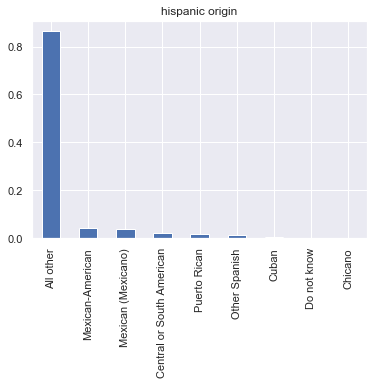

In [24]:
column = census['hispanic origin']
values = column.value_counts(normalize=True)
print(values)
values.plot.bar()
plt.title(column.name)
plt.show()

### Sex

Female    0.521163
Male      0.478837
Name: sex, dtype: float64


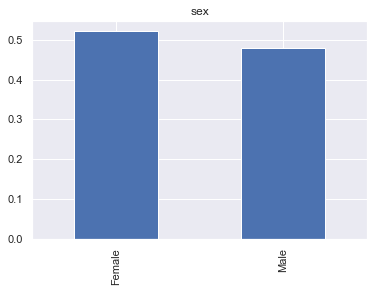

In [25]:
column = census['sex']
values = column.value_counts(normalize=True)
print(values)
values.plot.bar()
plt.title(column.name)
plt.show()

That's a sex ratio of 0.919 males/female, which is pretty significant considering the natural birth sex ratio is [estimated to be around 1.06 males/female](https://en.wikipedia.org/wiki/Human_sex_ratio)! Seems in the US the adult male is more likely to die young than the typical female (more likely to be a victim of homicide, more likely to die in an accident). Combined with an aging populaion, this produces a significant imbalance in distribution of age with respect to gender.

This was supposed to just be a univariate analysis but this is quite interesting! Let's see if my hypothesis that the sex imbalance is correlated with an aging female population holds true.

In [26]:
columns = census[['age','sex']]

In [27]:
female_mask = (columns['sex'] == 'Female')
female_ages = columns.loc[female_mask,'age']
female_ages.describe()

count    103984.000000
mean         35.618230
std          22.733951
min           0.000000
25%          16.000000
50%          34.000000
75%          51.000000
max          90.000000
Name: age, dtype: float64

In [28]:
male_mask = (columns['sex'] == 'Male')
male_ages = columns.loc[male_mask,'age']
male_ages.describe()

count    95539.000000
mean        33.270811
std         21.775410
min          0.000000
25%         14.000000
50%         32.000000
75%         48.000000
max         90.000000
Name: age, dtype: float64

The mean and median age of males is indeed lower. Let's look at the actual distribution...

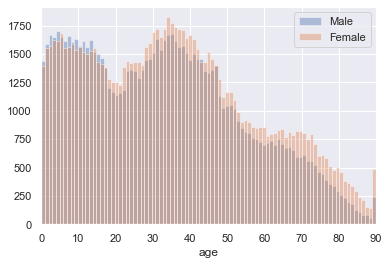

In [29]:
# Plot histogram of both male and female ages
f, ax = plt.subplots()

sns.distplot(male_ages,bins=91,kde=False, ax=ax)
sns.distplot(female_ages,bins=91,kde=False, ax=ax)
plt.legend(['Male','Female'])
plt.xlim([0,90])
plt.show()

Yes, more males at birth, but the male mortality rate is also higher and above ~18 years old there are more females, and there are approximately twice as many 90+ females than male. Interesting!

### Member of a labour union

In [30]:
column = census['member of a labor union']
percentearningnothing = column.loc[(column=='Not in universe')].count()/len(census)
print('Unclassified percentage: {:2.1f}%'.format(percentearningnothing*100))

Unclassified percentage: 90.4%


Seems most people are missing this data. For people where this data is provided:

No     0.841062
Yes    0.158938
Name: member of a labor union, dtype: float64


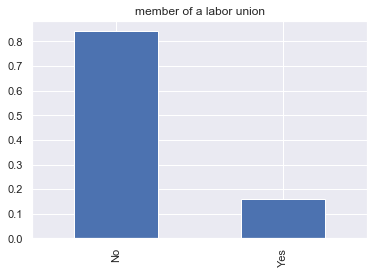

In [31]:
column = census['member of a labor union']
column = column.loc[(column!='Not in universe')] # Select only rows with non-zero value
values = column.value_counts(normalize=True)
print(values)
values.plot.bar()
plt.title(column.name)
plt.show()

### Reason for unemployment

In [32]:
column = census['reason for unemployment']
percentearningnothing = column.loc[(column=='Not in universe')].count()/len(census)
print('Unclassified percentage: {:2.1f}%'.format(percentearningnothing*100))

Unclassified percentage: 97.0%


Most people are employed, retired, or children, or are missing this data. Neglecting these:

Other job loser          0.335750
Re-entrant               0.332619
Job loser - on layoff    0.160791
Job leaver               0.098517
New entrant              0.072323
Name: reason for unemployment, dtype: float64


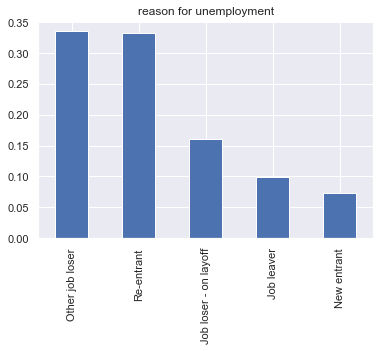

In [33]:
column = census['reason for unemployment']
column = column.loc[(column!='Not in universe')] # Select only rows with non-zero value
values = column.value_counts(normalize=True)
print(values)
values.plot.bar()
plt.title(column.name)
plt.show()

### Employment status

In [34]:
column = census['full or part time employment stat']
percentearningnothing = column.loc[(column=='Not in universe')].count()/len(census)
print('Unclassified percentage: {:2.1f}%'.format(percentearningnothing*100))

Unclassified percentage: 0.0%


Children or Armed Forces              0.620324
Full-time schedules                   0.204167
Not in labor force                    0.134360
PT for non-econ reasons usually FT    0.016650
Unemployed full-time                  0.011583
PT for econ reasons usually PT        0.006059
Unemployed part- time                 0.004225
PT for econ reasons usually FT        0.002631
Name: full or part time employment stat, dtype: float64


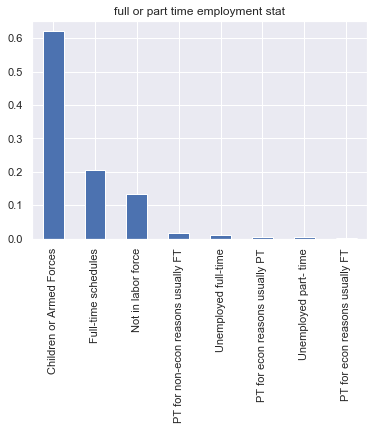

In [35]:
column = census['full or part time employment stat']
column = column.loc[(column!='Not in universe')] # Select only rows with non-zero value
values = column.value_counts(normalize=True)
print(values)
values.plot.bar()
plt.title(column.name)
plt.show()

Kinda weird that children are lumped in with armed forces, but okay...

### Capital gains and losses

In [36]:
column = census['capital gains']
percentearningnothing = column.loc[(column==0)].count()/len(census)
print('Percent with zero capital gains: {:2.1f}%'.format(percentearningnothing*100))

Percent with zero capital gains: 96.3%


Most people probably are not investing, or not reporting their capital gains.

In [37]:
column = census['capital gains']
column = column.loc[(column!=0)] # Select only rows with non-zero value
column.describe()

count     7379.000000
mean     11754.497493
std      21533.053259
min        114.000000
25%       2964.000000
50%       5178.000000
75%      10520.000000
max      99999.000000
Name: capital gains, dtype: float64

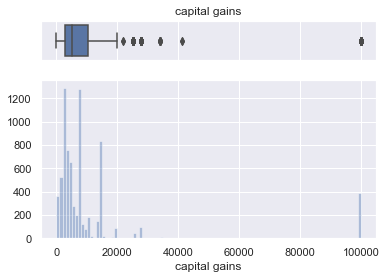

In [38]:
column = census['capital gains']
column = column.loc[(column!=0)] # Select only rows with non-zero value

# Generate two axes on figure
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2,.8)})
 
# Plot histogram and boxplot
sns.distplot(column,bins=100,kde=False, ax=ax_hist)
sns.boxplot(column, ax=ax_box)

ax_box.set(xlabel='')
ax_box.set(title=column.name)
plt.show()

This column seems to be capped at 99999

In [39]:
column = census['capital losses']
percentearningnothing = column.loc[(column==0)].count()/len(census)
print('Percent with zero capital losses: {:2.1f}%'.format(percentearningnothing*100))

Percent with zero capital losses: 98.0%


In [40]:
column = census['capital losses']
column = column.loc[(column!=0)] # Select only rows with non-zero value
column.describe()

count    3906.000000
mean     1906.031490
std       463.154428
min       155.000000
25%      1669.000000
50%      1887.000000
75%      2001.000000
max      4608.000000
Name: capital losses, dtype: float64

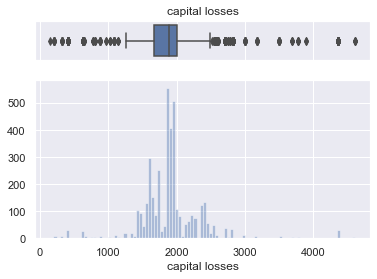

In [41]:
column = census['capital losses']
column = column.loc[(column!=0)] # Select only rows with non-zero value

# Generate two axes on figure
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2,.8)})
 
# Plot histogram and boxplot
sns.distplot(column,bins=100,kde=False, ax=ax_hist)
sns.boxplot(column, ax=ax_box)

ax_box.set(xlabel='')
ax_box.set(title=column.name)
plt.show()

### Dividends from stocks

In [42]:
column = census['dividends from stocks']
percentearningnothing = column.loc[(column==0)].count()/len(census)
print('Percent with zero dividends: {:2.1f}%'.format(percentearningnothing*100))

Percent with zero dividends: 89.4%


Most people probably are not investing.

In [43]:
column = census['dividends from stocks']
column = column.loc[(column!=0)] # Select only rows with non-zero value
column.describe()

count    21141.000000
mean      1864.229932
std       5835.216597
min          1.000000
25%         82.000000
50%        301.000000
75%       1362.000000
max      99999.000000
Name: dividends from stocks, dtype: float64

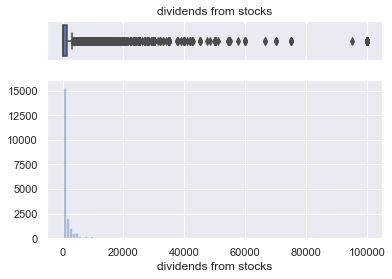

In [44]:
column = census['dividends from stocks']
column = column.loc[(column!=0)] # Select only rows with non-zero value

# Generate two axes on figure
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2,.8)})
 
# Plot histogram and boxplot
sns.distplot(column,bins=100,kde=False, ax=ax_hist)
sns.boxplot(column, ax=ax_box)

ax_box.set(xlabel='')
ax_box.set(title=column.name)
plt.show()

### Tax filer status

In [45]:
column = census['tax filer stat']
percentearningnothing = column.loc[(column=='Not in universe')].count()/len(census)
print('Unclassified percentage: {:2.1f}%'.format(percentearningnothing*100))

Unclassified percentage: 0.0%


Nonfiler                        0.376368
Joint both under 65             0.337720
Single                          0.187552
Joint both 65+                  0.041760
Head of household               0.037219
Joint one under 65 & one 65+    0.019381
Name: tax filer stat, dtype: float64


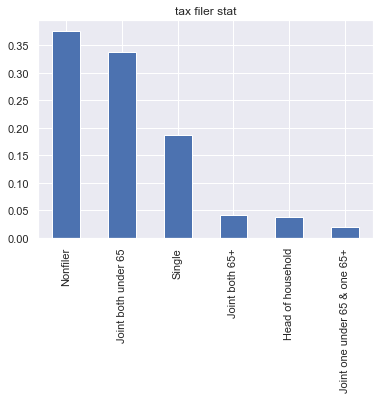

In [46]:
column = census['tax filer stat']
column = column.loc[(column!='Not in universe')] # Select only rows with non-zero value
values = column.value_counts(normalize=True)
print(values)
values.plot.bar()
plt.title(column.name)
plt.show()

### Previous residence

In [47]:
column = census['region of previous residence']
percentearningnothing = column.loc[(column=='Not in universe')].count()/len(census)
print('Unclassified percentage: {:2.1f}%'.format(percentearningnothing*100))

Unclassified percentage: 92.1%


Unclassified likely includes missing data and people who have not moved

Not in universe    0.920946
South              0.024503
West               0.020419
Midwest            0.017918
Northeast          0.013557
Abroad             0.002656
Name: region of previous residence, dtype: float64


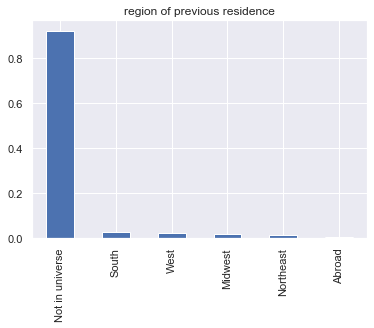

In [48]:
column = census['region of previous residence']
#column = column.loc[(column!='Not in universe')] # Select only rows with non-zero value
values = column.value_counts(normalize=True)
print(values)
values.plot.bar()
plt.title(column.name)
plt.show()

In [49]:
column = census['state of previous residence']
percentearningnothing = column.loc[(column=='Not in universe')].count()/len(census)
print('Unclassified percentage: {:2.1f}%'.format(percentearningnothing*100))

Unclassified percentage: 92.1%


Unclassified likely includes missing data and people who have not moved

In [50]:
column = census['state of previous residence']
column = column.loc[(column!='Not in universe')] # Select only rows with non-zero value
values = column.value_counts(normalize=True)
print(values)
#values.plot.bar()
#plt.title(column.name)
#plt.show()

California              0.113774
Utah                    0.070561
Florida                 0.056356
North Carolina          0.053900
Abroad                  0.044540
Oklahoma                0.041553
Minnesota               0.038234
Indiana                 0.035380
North Dakota            0.033123
New Mexico              0.030733
Michigan                0.029273
Alaska                  0.019250
Kentucky                0.016196
Arizona                 0.016130
New Hampshire           0.016064
Wyoming                 0.015997
Colorado                0.015865
Oregon                  0.015665
West Virginia           0.015334
Georgia                 0.015068
Montana                 0.015002
Alabama                 0.014338
Ohio                    0.014006
Texas                   0.013873
Arkansas                0.013608
Mississippi             0.013541
Tennessee               0.013409
Pennsylvania            0.013209
New York                0.012944
Louisiana               0.012745
Vermont   

### Household and family

In [51]:
column = census['detailed household and family stat']
column = column.loc[(column!='Not in universe')] # Select only rows with non-zero value
values = column.value_counts(normalize=True)
print(values)
#values.plot.bar()
#plt.title(column.name)
#plt.show()

Householder                                        0.266877
Child <18 never marr not in subfamily              0.252232
Spouse of householder                              0.208973
Nonfamily householder                              0.111331
Child 18+ never marr Not in a subfamily            0.060294
Secondary individual                               0.030683
Other Rel 18+ ever marr not in subfamily           0.009803
Grandchild <18 never marr child of subfamily RP    0.009362
Other Rel 18+ never marr not in subfamily          0.008661
Grandchild <18 never marr not in subfamily         0.005343
Child 18+ ever marr Not in a subfamily             0.005077
Child under 18 of RP of unrel subfamily            0.003669
RP of unrelated subfamily                          0.003433
Child 18+ ever marr RP of subfamily                0.003363
Other Rel 18+ ever marr RP of subfamily            0.003288
Other Rel <18 never marr child of subfamily RP     0.003288
Other Rel 18+ spouse of subfamily RP    

In [52]:
column = census['detailed household summary in household']
column = column.loc[(column!='Not in universe')] # Select only rows with non-zero value
values = column.value_counts(normalize=True)
print(values)
#values.plot.bar()
#plt.title(column.name)
#plt.show()

Householder                             0.378277
Child under 18 never married            0.252733
Spouse of householder                   0.209044
Child 18 or older                       0.072322
Other relative of householder           0.048631
Nonrelative of householder              0.038096
Group Quarters- Secondary individual    0.000662
Child under 18 ever married             0.000236
Name: detailed household summary in household, dtype: float64


Both parents present      0.705051
Mother only present       0.230996
Father only present       0.034056
Neither parent present    0.029896
Name: family members under 18, dtype: float64


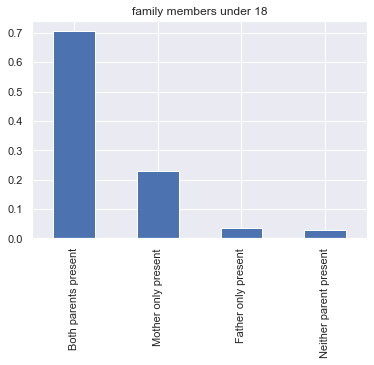

In [53]:
column = census['family members under 18']
column = column.loc[(column!='Not in universe')] # Select only rows with non-zero value
values = column.value_counts(normalize=True)
print(values)
values.plot.bar()
plt.title(column.name)
plt.show()

### Migration

In [54]:
column = census['migration code-change in msa']
percentearningnothing = column.loc[(column=='Not in universe')].count()/len(census)
print('Unclassified percentage: {:2.1f}%'.format(percentearningnothing*100))

Unclassified percentage: 0.8%


Nonmover            0.826810
MSA to MSA          0.106194
NonMSA to nonMSA    0.028159
Not in universe     0.015186
MSA to nonMSA       0.007914
NonMSA to MSA       0.006161
Abroad to MSA       0.004538
Not identifiable    0.004307
Abroad to nonMSA    0.000731
Name: migration code-change in msa, dtype: float64


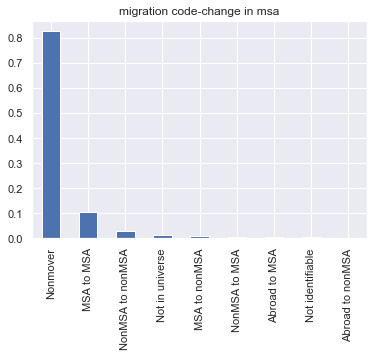

In [55]:
column = census['migration code-change in msa']
#column = column.loc[(column!='Not in universe')] # Select only rows with non-zero value
values = column.value_counts(normalize=True)
print(values)
values.plot.bar()
plt.title(column.name)
plt.show()

In [56]:
column = census['migration code-change in reg']
percentearningnothing = column.loc[(column=='Not in universe')].count()/len(census)
print('Unclassified percentage: {:2.1f}%'.format(percentearningnothing*100))

Unclassified percentage: 0.8%


Nonmover                          0.826810
Same county                       0.098290
Different county same state       0.028018
Not in universe                   0.015186
Different region                  0.011800
Different state same division     0.009927
Abroad                            0.005309
Different division same region    0.004658
Name: migration code-change in reg, dtype: float64


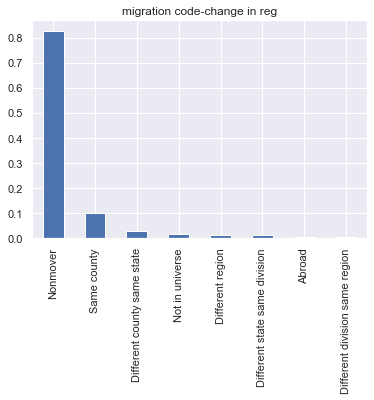

In [57]:
column = census['migration code-change in reg']
#column = column.loc[(column!='Not in universe')] # Select only rows with non-zero value
values = column.value_counts(normalize=True)
print(values)
values.plot.bar()
plt.title(column.name)
plt.show()

In [58]:
column = census['migration code-move within reg']
percentearningnothing = column.loc[(column=='Not in universe')].count()/len(census)
print('Unclassified percentage: {:2.1f}%'.format(percentearningnothing*100))

Unclassified percentage: 0.8%


Nonmover                        0.826810
Same county                     0.098290
Different county same state     0.028018
Not in universe                 0.015186
Different state in South        0.009747
Different state in West         0.006802
Different state in Midwest      0.005520
Abroad                          0.005309
Different state in Northeast    0.004317
Name: migration code-move within reg, dtype: float64


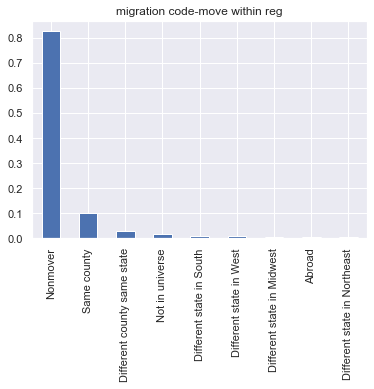

In [59]:
column = census['migration code-move within reg']
#column = column.loc[(column!='Not in universe')] # Select only rows with non-zero value
values = column.value_counts(normalize=True)
print(values)
values.plot.bar()
plt.title(column.name)
plt.show()

Not in universe under 1 year old    0.507270
Yes                                 0.413677
No                                  0.079054
Name: live in this house 1 year ago, dtype: float64


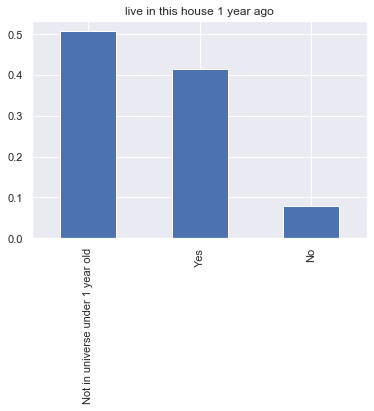

In [60]:
column = census['live in this house 1 year ago']
#column = column.loc[(column!='Not in universe')] # Select only rows with non-zero value
values = column.value_counts(normalize=True)
print(values)
values.plot.bar()
plt.title(column.name)
plt.show()

Not in universe    0.841997
No                 0.100043
Yes                0.057960
Name: migration prev res in sunbelt, dtype: float64


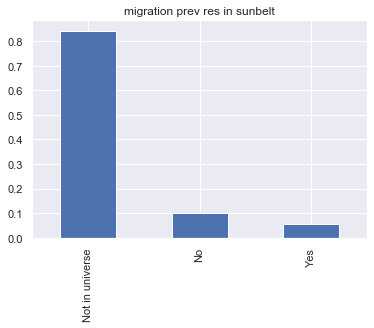

In [61]:
column = census['migration prev res in sunbelt']
#column = column.loc[(column!='Not in universe')] # Select only rows with non-zero value
values = column.value_counts(normalize=True)
print(values)
values.plot.bar()
plt.title(column.name)
plt.show()

### Num persons worked for employer

In [62]:
column = census['num persons worked for employer']
numberofzero = column.loc[(column==0)].count()/len(census)
print('Percent with zero persons: {:2.1f}%'.format(numberofzero*100))

Percent with zero persons: 48.1%


Might include unknown values

In [63]:
column = census['num persons worked for employer']
#column = column.loc[(column!=0)] # Select only rows with non-zero value
column.value_counts().sort_index()

0    95983
1    23109
2    10081
3    13425
4    14379
5     6035
6    36511
Name: num persons worked for employer, dtype: int64

This column has six discrete values! Checking out the [technical documentation of the census](https://www2.census.gov/programs-surveys/cps/techdocs/cpsmar19.pdf), this is because the NOEMP statistic actually specifies a *range*, given by:
- 0 = nil
- 1 = under 10
- 2 = 10 - 24
- 3 = 25 - 99
- 4 = 100 - 499
- 5 = 500 - 999
- 6 = 1000+

nil          0.481062
under 10     0.115821
10 - 24      0.050526
25 - 99      0.067285
100 - 499    0.072067
500 - 999    0.030247
1000+        0.182991
Name: num persons worked for employer, dtype: float64


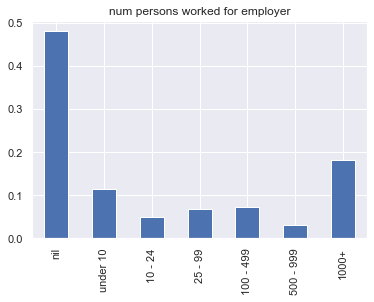

In [64]:
values = column.value_counts(normalize=True).sort_index()
values.index = ['nil','under 10','10 - 24','25 - 99','100 - 499','500 - 999','1000+']
print(values)
values.plot.bar()
plt.title(column.name)
plt.show()

This creates an odd feature of the dataset where the values are categorical but ordered, with categories of unequal size. 

### Citizenship

There are too many categories in this to easily discern on a bar chart. We can just as easily get the same information by just looking at the numbers themselves.

In [65]:
column = census['country of birth father']
column = column.loc[(column!='Not in universe')] # Select only rows with non-zero value
values = column.value_counts(normalize=True)
print(values)
#values.plot.bar()
#plt.title(column.name)
#plt.show()

United-States                   0.825491
Mexico                          0.051906
Puerto-Rico                     0.013900
Italy                           0.011472
Canada                          0.007157
Germany                         0.007033
Dominican-Republic              0.006691
Poland                          0.006286
Philippines                     0.005985
Cuba                            0.005835
El-Salvador                     0.005093
China                           0.004440
England                         0.004113
Columbia                        0.003184
India                           0.003008
South Korea                     0.002749
Ireland                         0.002635
Jamaica                         0.002401
Vietnam                         0.002370
Guatemala                       0.002308
Japan                           0.002033
Portugal                        0.002012
Ecuador                         0.001966
Haiti                           0.001820
Greece          

In [66]:
column = census['country of birth mother']
column = column.loc[(column!='Not in universe')] # Select only rows with non-zero value
values = column.value_counts(normalize=True)
print(values)
#values.plot.bar()
#plt.title(column.name)
#plt.show()

United-States                   0.829761
Mexico                          0.050573
Puerto-Rico                     0.012787
Italy                           0.009534
Canada                          0.007502
Germany                         0.007146
Philippines                     0.006365
Poland                          0.005739
Cuba                            0.005729
El-Salvador                     0.005729
Dominican-Republic              0.005703
England                         0.004669
China                           0.003930
Columbia                        0.003164
South Korea                     0.003149
Ireland                         0.003097
India                           0.003004
Vietnam                         0.002446
Japan                           0.002425
Jamaica                         0.002342
Guatemala                       0.002296
Ecuador                         0.001939
Peru                            0.001836
Haiti                           0.001825
Portugal        

In [67]:
column = census['country of birth self']
column = column.loc[(column!='Not in universe')] # Select only rows with non-zero value
values = column.value_counts(normalize=True)
print(values)
#values.plot.bar()
#plt.title(column.name)
#plt.show()

United-States                   0.902407
Mexico                          0.029404
Puerto-Rico                     0.007138
Germany                         0.004339
Philippines                     0.004308
Cuba                            0.004268
Canada                          0.003569
Dominican-Republic              0.003518
El-Salvador                     0.003513
China                           0.002437
South Korea                     0.002401
England                         0.002330
Columbia                        0.002213
Italy                           0.002136
India                           0.002080
Vietnam                         0.001994
Poland                          0.001943
Guatemala                       0.001754
Japan                           0.001728
Jamaica                         0.001632
Peru                            0.001366
Ecuador                         0.001315
Haiti                           0.001162
Nicaragua                       0.001112
Taiwan          

### Own business or self-employed

0    0.905520
2    0.080958
1    0.013522
Name: own business or self employed, dtype: float64


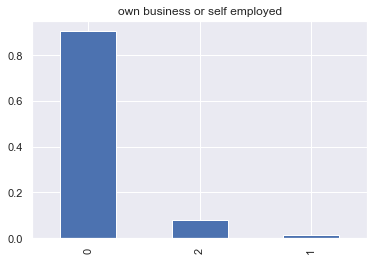

In [68]:
column = census['own business or self employed']
#column = column.loc[(column!='Not in universe')] # Select only rows with non-zero value
values = column.value_counts(normalize=True)
print(values)
values.plot.bar()
plt.title(column.name)
plt.show()

### Fill inc questionnaire for veteran's admin

In [69]:
column = census['fill inc questionnaire for veteran\'s admin']
percentmissing = column.loc[(column=='Not in universe')].count()/len(census)
print('Unclassified percentage: {:2.1f}%'.format(percentmissing*100))

Unclassified percentage: 99.0%


Most people are unclassified. Next plot ignores unclassified values so that other values appear with a reosonable scale.

No     0.802923
Yes    0.197077
Name: fill inc questionnaire for veteran's admin, dtype: float64


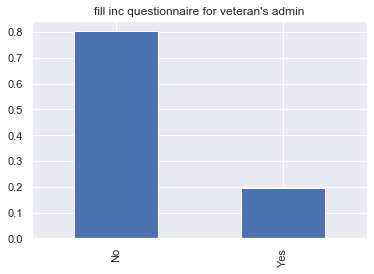

In [70]:
column = census['fill inc questionnaire for veteran\'s admin']
column = column.loc[(column!='Not in universe')] # Select only rows with non-zero value
values = column.value_counts(normalize=True)
print(values)
values.plot.bar()
plt.title(column.name)
plt.show()

### Veterans benefits

2    0.752445
0    0.237612
1    0.009944
Name: veterans benefits, dtype: float64


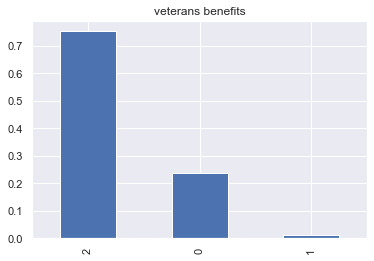

In [71]:
column = census['veterans benefits']
#column = column.loc[(column!='Not in universe')] # Select only rows with non-zero value
values = column.value_counts(normalize=True)
print(values)
values.plot.bar()
plt.title(column.name)
plt.show()

### Weeks worked in year

In [72]:
column = census['weeks worked in year']
numberofzero = column.loc[(column==0)].count()/len(census)
print('Percent with zero weeks: {:2.1f}%'.format(numberofzero*100))
numberof52 = column.loc[(column==52)].count()/len(census)
print('Percent working all year: {:2.1f}%'.format(numberof52*100))

Percent with zero weeks: 48.1%
Percent working all year: 35.2%


In [73]:
column = census['weeks worked in year']
#column = column.loc[(column!=0)] # Select only rows with non-zero value
column.describe()

count    199523.000000
mean         23.174897
std          24.411488
min           0.000000
25%           0.000000
50%           8.000000
75%          52.000000
max          52.000000
Name: weeks worked in year, dtype: float64

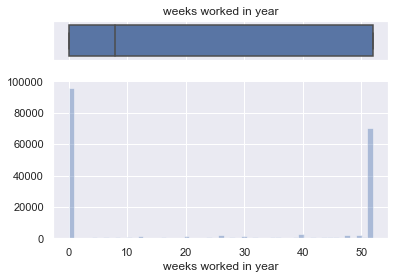

In [74]:
column = census['weeks worked in year']
#column = column.loc[(column!=0)] # Select only rows with non-zero value

# Generate two axes on figure
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2,.8)})
 
# Plot histogram and boxplot
sns.distplot(column,bins=53,kde=False, ax=ax_hist)
sns.boxplot(column, ax=ax_box)

ax_box.set(xlabel='')
ax_box.set(title=column.name)
plt.show()

Very heavily skewed toward 0 weeks and 52 weeks! For the sake of being able to see the distribution between these, let's ignore these in the next plot. Bear in mind this next plot is therefore somewhat artificial.

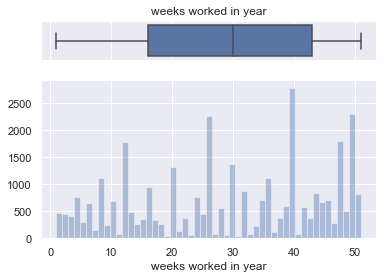

In [75]:
column = census['weeks worked in year']
column = column.loc[(column!=0)] # Select only rows with non-zero value
column = column.loc[(column!=52)] # Select only rows with non-zero value

# Generate two axes on figure
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.2,.8)})
 
# Plot histogram and boxplot
sns.distplot(column,bins=51,kde=False, ax=ax_hist)
sns.boxplot(column, ax=ax_box)

ax_box.set(xlabel='')
ax_box.set(title=column.name)
plt.show()